In [ ]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix,
)
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


devNumber = torch.cuda.current_device()
devName = torch.cuda.get_device_name(devNumber)
print(f"Using device: {device}")
print(f"Current device number is: {devNumber}")
print(f"GPU name is: {devName}")


Using device: cuda
Current device number is: 0
GPU name is: NVIDIA GeForce RTX 4070 SUPER


Epoch [1/20], Train Loss: 4.4332, Val Loss: 4.0171, Val Accuracy: 0.0629
Epoch [2/20], Train Loss: 3.9212, Val Loss: 3.5595, Val Accuracy: 0.1513
Epoch [3/20], Train Loss: 3.6220, Val Loss: 3.3191, Val Accuracy: 0.1943
Epoch [4/20], Train Loss: 3.4249, Val Loss: 3.1224, Val Accuracy: 0.2256
Epoch [5/20], Train Loss: 3.2629, Val Loss: 2.8996, Val Accuracy: 0.2671
Epoch [6/20], Train Loss: 3.1318, Val Loss: 2.8402, Val Accuracy: 0.2830
Epoch [7/20], Train Loss: 3.0417, Val Loss: 2.6750, Val Accuracy: 0.3138
Epoch [8/20], Train Loss: 2.9564, Val Loss: 2.5878, Val Accuracy: 0.3245
Epoch [9/20], Train Loss: 2.8801, Val Loss: 2.5776, Val Accuracy: 0.3307
Epoch [10/20], Train Loss: 2.8269, Val Loss: 2.5469, Val Accuracy: 0.3365
Epoch [11/20], Train Loss: 2.7733, Val Loss: 2.4299, Val Accuracy: 0.3606
Epoch [12/20], Train Loss: 2.7272, Val Loss: 2.4539, Val Accuracy: 0.3612
Epoch [13/20], Train Loss: 2.6829, Val Loss: 2.3510, Val Accuracy: 0.3818
Epoch [14/20], Train Loss: 2.6434, Val Loss: 2.

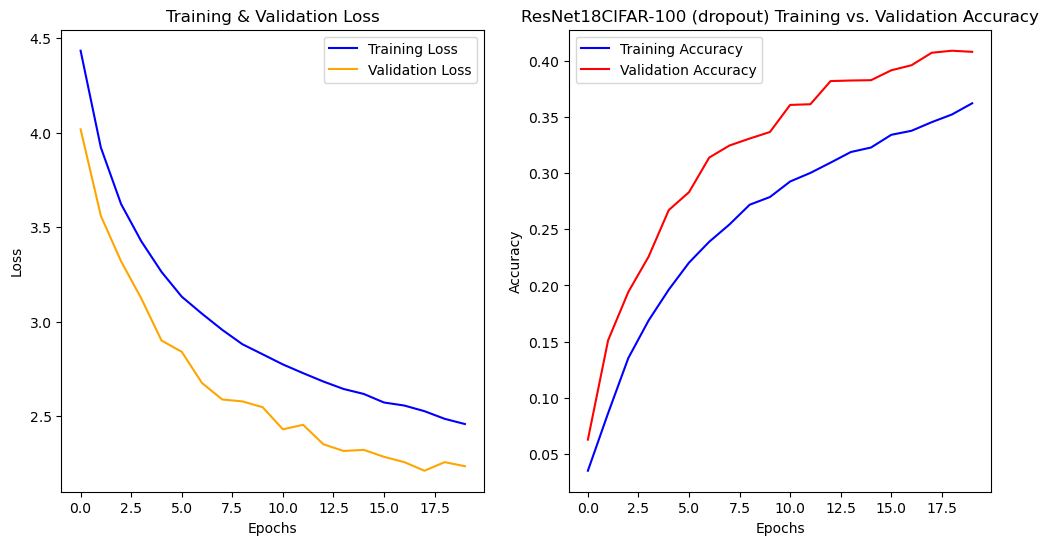


Final Test Accuracy: 0.4078


In [ ]:
'''
Problem 1 (40pts)

In this homework, we focus on the language model we did in the lectures. However, we expand it to a much longer sequence. Here is the sequence:

“Next character prediction is a fundamental task in the field of natural language processing (NLP) that involves 
predicting the next character in a sequence of text based on the characters that precede it. This task is essential 
for various applications, including text auto-completion, spell checking, and even in the development of sophisticated 
AI models capable of generating human-like text.

At its core, next character prediction relies on statistical models or deep learning algorithms to analyze a given 
sequence of text and predict which character is most likely to follow. These predictions are based on patterns and 
relationships learned from large datasets of text during the training phase of the model.

One of the most popular approaches to next character prediction involves the use of Recurrent Neural Networks (RNNs), 
and more specifically, a variant called Long Short-Term Memory (LSTM) networks. RNNs are particularly well-suited for 
sequential data like text, as they can maintain information in 'memory' about previous characters to inform the prediction 
of the next character. LSTM networks enhance this capability by being able to remember long-term dependencies, making them 
even more effective for next character prediction tasks.

Training a model for next character prediction involves feeding it large amounts of text data, allowing it to learn the 
probability of each character's appearance following a sequence of characters. During this training process, the model 
adjusts its parameters to minimize the difference between its predictions and the actual outcomes, thus improving its 
predictive accuracy over time.

Once trained, the model can be used to predict the next character in a given piece of text by considering the sequence 
of characters that precede it. This can enhance user experience in text editing software, improve efficiency in coding 
environments with auto-completion features, and enable more natural interactions with AI-based chatbots and virtual assistants.

In summary, next character prediction plays a crucial role in enhancing the capabilities of various NLP applications, 
making text-based interactions more efficient, accurate, and human-like. Through the use of advanced machine learning 
models like RNNs and LSTMs, next character prediction continues to evolve, opening new possibilities for the future of 
text-based technology.”

Inspired by the course example, train and validate rnn.RNN, rnn.LSTM and rnn.GRU for learning the above sequence. Use 
sequence lengths of 10, 20, and 30 for your training. Feel free to adjust other network parameters. Report and compare
training loss, validation accuracy, execution time for training, and computational and mode size complexities across the 
three models over various lengths of sequence.

 
'''
# Problem 3: Simplified Resnet-18 model CIFAR-100 with Dropout
batch_size = 64
learning_rate = 0.001
num_epochs = 20
num_classes = 100

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize(32), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR100(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR100(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ResNet Block with Dropout
class Block(nn.Module):
    def __init__(self, in_channels, out_channels, identity_downsample=None, stride=1, dropout_prob=0.3):
        super(Block, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(p=dropout_prob)  

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.dropout2 = nn.Dropout(p=dropout_prob)  

        self.identity_downsample = identity_downsample

    def forward(self, x):
        identity = x
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout1(x)  

        x = self.conv2(x)
        x = self.bn2(x)

        if self.identity_downsample is not None:
            identity = self.identity_downsample(identity)

        x += identity
        x = self.relu(x)
        x = self.dropout2(x)  
        return x

# ResNet-18 Model with Dropout
class ResNet18(nn.Module):
    def __init__(self, image_channels, num_classes, dropout_prob=0.3):
        super(ResNet18, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(image_channels, 64, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.dropout = nn.Dropout(p=dropout_prob)  

        self.layer1 = self.__make_layer(64, 64, stride=1, dropout_prob=dropout_prob)
        self.layer2 = self.__make_layer(64, 128, stride=2, dropout_prob=dropout_prob)
        self.layer3 = self.__make_layer(128, 256, stride=2, dropout_prob=dropout_prob)
        self.layer4 = self.__make_layer(256, 512, stride=2, dropout_prob=dropout_prob)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)
        self.fc_dropout = nn.Dropout(p=dropout_prob) 

    def __make_layer(self, in_channels, out_channels, stride, dropout_prob):
        identity_downsample = None
        if stride != 1:
            identity_downsample = self.identity_downsample(in_channels, out_channels)
        return nn.Sequential(
            Block(in_channels, out_channels, identity_downsample=identity_downsample, stride=stride, dropout_prob=dropout_prob),
            Block(out_channels, out_channels, dropout_prob=dropout_prob)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.dropout(x) 

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.shape[0], -1)
        x = self.fc_dropout(x) 
        x = self.fc(x)
        return x 

    def identity_downsample(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(out_channels)
        )


# Initialize model, loss function, and optimizer
model = ResNet18(image_channels=3, num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training function 
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs):
    train_losses = []
    val_losses = [] 
    train_accuracies = []
    val_accuracies = []
    
    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train, total_train = 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_train += (preds == labels).sum().item()
            total_train += labels.size(0)

        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(correct_train / total_train)

        # Validation step
        model.eval()
        val_loss = 0.0
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)

                loss = criterion(outputs, labels)  
                val_loss += loss.item()

                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        val_losses.append(val_loss / len(test_loader))  
        val_accuracy = accuracy_score(all_labels, all_preds)
        val_accuracies.append(val_accuracy)

        print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.4f}")

    total_time = time.time() - start_time
    return train_losses, val_losses, train_accuracies, val_accuracies, total_time

# Train the model
train_losses, val_losses, train_accuracies, val_accuracies, training_time = train_model(
    model, train_loader, test_loader, criterion, optimizer, num_epochs
)


print(f"\nTraining Time: {training_time:.2f} seconds")


# Plot Training Loss and Accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(range(len(train_losses)), train_losses, label="Training Loss", color="blue")
ax1.plot(range(len(val_losses)), val_losses, label="Validation Loss", color="orange")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_title("Training & Validation Loss")
ax1.legend()

ax2.plot(range(len(train_accuracies)), train_accuracies, label="Training Accuracy", color="blue")
ax2.plot(range(len(val_accuracies)), val_accuracies, label="Validation Accuracy", color="red")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_title("ResNet18CIFAR-100 (dropout) Training vs. Validation Accuracy")
ax2.legend()

plt.show()

# Final evaluation
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute final metrics
final_accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average="macro")

print(f"\nFinal Test Accuracy: {final_accuracy:.4f}")

In [ ]:
'''Problem 2 (60pts)

Build the model for.LSTM and rnn.GRU for the tiny Shakespeare dataset, the data loader code is already provided.

Train the models for the sequence of 20 and 30, report and compare training loss, validation accuracy, execution time for training, and computational and mode size complexities across the two models.
Adjust the hyperparameters (fully connected network, number of hidden layers, and the number of hidden states) and compare your results (training and validation loss, computation complexity, model size, training and inference time, and the output sequence). Analyze their influence on accuracy, running time, and computational perplexity.
What if we increase the sequence length to 50. Perform the training and report the accuracy and model complexity results.'''